<h1 style="color: darkgreen; text-align:center">Numerical Simulation Laboratory 2021</h1>

<p style="text-align:center"><b>Author:</b> Giacomo Riccardo Hvaring</p>

---

<h1 style="text-align:center"> Molecular Dynamics</h1>

## exercise 4.1

The Molecular Dynamics (MD) C++ code starts the simulation run from a provided spatial configuration of the $N$ particles (found in the file <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration to the file <font face="Courier">config.final</font>. 

<p class="assignement"> Improve the MD code by allowing the simulation to <b>(re)start</b>, reading both an actual spatial configuration [$\vec{r}(t)$] file and an <b>old</b> [$\vec{r}(t-dt)$] one. Add also the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature. Then discuss how you managed to equilibrate the different thermodynamic phases, keeping in mind that <b>one image is worth a thousand words!</b></p>

The typical required operations when the re-start option will be enabled are:
1. read $\vec{r}(t)$ and $\vec{r}(t-dt)$ from the corresponding input files
2. compute $\vec{r}(t+dt)$ with one step of the Verlet algorithm; with $\vec{r}(t+dt)$ and $\vec{r}(t)$ compute $\vec{v}(t+dt/2)$; finally obtain the actual temperature $T(t+dt/2)$
3. by comparing $T(t+dt/2)$ with the desired/target temperature  $T^\star$ extract a scaling factor for the velocities and rescale them: $\vec{v}(t) \to \vec{v}_s(t)$
4. use $\vec{v}_s(t)$ to estimate a novel **old** spatial configuration: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
5. use $\vec{r}_{new}(t)$ and $\vec{r}(t+dt)$ to start the simulation
6. Do not forget to use **periodic boundary contitions** every time it is appropriate!

This will help you, especially in the equilibration phases of your simulations.

In [1]:
from libsim import * # module containing some handy functions for the labs

results_directory += "lab_04/" # where the data are stored
HTML(custom_css())

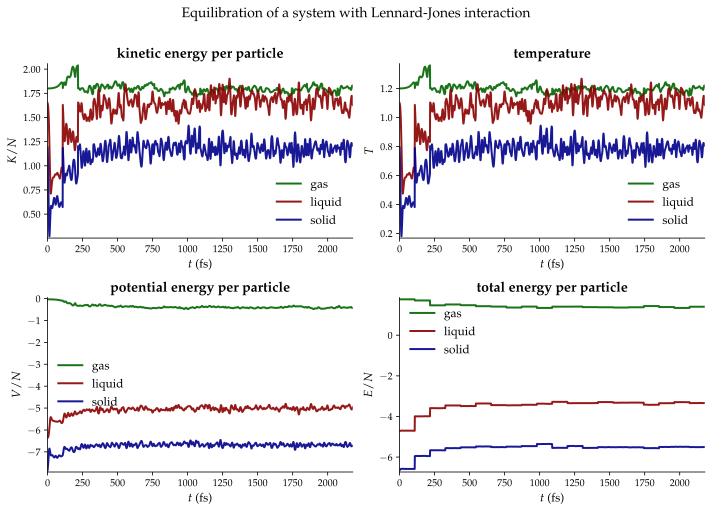

In [2]:
suptitle = "Equilibration of a system with Lennard-Jones interaction"
xlabel = "$t$ (fs)"
names = ["kinetic", "temperature", "potential", "total"]
epp = " energy per particle"
titles = [ names[0] + epp, names[1], names[2] + epp, names[3] + epp ]
ylabels = ["$K/N$", "$T$", "$V/N$", "$E/N$"]
phases = ["gas", "liquid", "solid"]
colors = ['darkgreen', 'darkred', 'darkblue']
dt = 1.09 # x10^(-15)s = time equivalent to 10 MC steps (1 measurement)

fig, ax = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle(suptitle, y=1.01)

for axis, ylabel, name, title in zip(ax.reshape(4), ylabels, names, titles):
    set_labels(axis, title, xlabel, ylabel)
    for phase, ylabel, color in zip(phases, ylabels, colors):
        file = name + '_' + phase[:3] + '.dat'
        y = np.loadtxt(results_directory + file)[:,1]
        final_t = dt * y.size
        x = np.arange(0, dt*y.size, dt)
        axis.plot(x, y, label=phase, lw=2, color=color, alpha=.9)
    axis.legend();

## exercise 4.2

The Molecular Dynamics code provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.

<p class="assignement"> Update the code with block averaging for the 4 quantities just mentioned.</p>

## exercise 4.3

By means of your upgraded MD code equilibrate and perform MD simulations via a Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
    
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

<p class="assignement"> Plot the obtained average values and uncertainties for the <b>total (internal) energy</b> per particle, $E/N$, the <b>potential energy</b> per particle, $U/N$, the <b>kinetic energy</b> per particle, $K/N$ and the <b>temperature</b>, $T$ ... in SI units!<p>

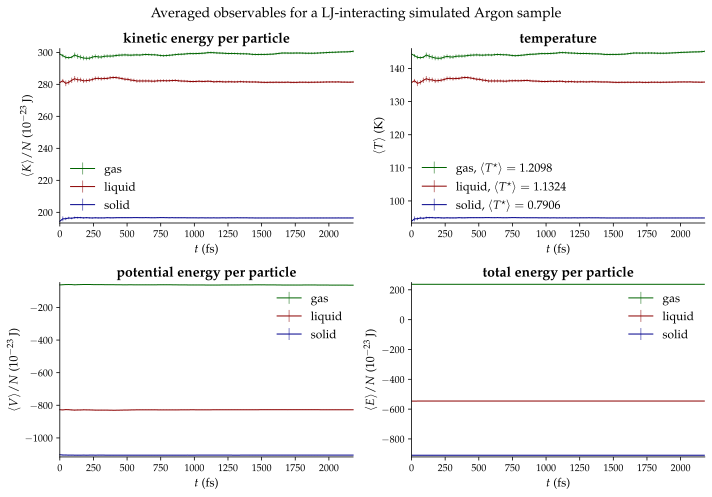

In [9]:
suptitle = "Averaged observables for a LJ-interacting simulated Argon sample"
dt = 0.109 # x10^(-15) s
T_factor = 120
kb = 1.38064852 # x10^(-23)
e_factor = T_factor * kb

def error_plot(ax, filename, color, label):
    data = np.loadtxt(results_directory + filename)
    y = data[:,-2]
    x = np.linspace(0, final_t, y.size)
    err = data[:,-1]
    if 'temperature' in filename:
        factor = T_factor
        label += f', $\\langle T^\star\\rangle = {np.round(y[-1],4)}$'
    else:
        factor = e_factor
    # plot
    markers, caps, bars = ax.errorbar(x, y * factor, yerr=err * factor, c=color, lw=1, label=label);
    # loop through bars and caps and set custom alpha value
    [bar.set_alpha(0.5) for bar in bars]
    [cap.set_alpha(0.5) for cap in caps]

fig, ax = plt.subplots(2,2,figsize=(10,7))
fig.suptitle(suptitle)
e_unit = '\t($10^{-23}$ J)'
ylabels = ["$\\langle K\\rangle/N$" + e_unit, "$\\langle T\\rangle$ (K)", 
           "$\\langle V\\rangle/N$" + e_unit, "$\\langle E\\rangle/N$" + e_unit]

for axis, ylabel, name, title in zip(ax.reshape(4), ylabels, names, titles):
    set_labels(axis, title, xlabel, ylabel)
    for phase, ylabel, color in zip(phases, ylabels, colors):
        file = 'avg_' + name + '_' + phase[:3] + '.dat'
        error_plot(axis, file, color, phase)
    axis.legend();